In [3]:
import pandas as pd
import numpy as np
url = 'https://archive.ics.uci.edu/ml/machine-learning-databases/wine/wine.data'
wine =pd.read_csv(url, header = None)
wine.head()

,0,1,2,3,4,5,6,7,8,9,10,11,12,13
0,1,14.23,1.71,2.43,15.6,127,2.80,3.06,0.28,2.29,5.64,1.04,3.92,1065
1,1,13.20,1.78,2.14,11.2,100,2.65,2.76,0.26,1.28,4.38,1.05,3.40,1050
2,1,13.16,2.36,2.67,18.6,101,2.80,3.24,0.30,2.81,5.68,1.03,3.17,1185
3,1,14.37,1.95,2.50,16.8,113,3.85,3.49,0.24,2.18,7.80,0.86,3.45,1480
4,1,13.24,2.59,2.87,21.0,118,2.80,2.69,0.39,1.82,4.32,1.04,2.93,735


In [4]:
wine.columns = ['Метка класса', "Алкоголь", "Яблочная кислота" , "Зола", "Щелочность золы", "Магний", "Всего фенола" , "Флаваноиды", "Фенолы нефлаваноидные", "Проантоцианины", "Интенсивность цвета","Оттенок", "Разбавленность вин", "Пролин"]

In [5]:
wine.tail()

,Метка класса,Алкоголь,Яблочная кислота,Зола,Щелочность золы,Магний,Всего фенола,Флаваноиды,Фенолы нефлаваноидные,Проантоцианины,Интенсивность цвета,Оттенок,Разбавленность вин,Пролин
173,3,13.71,5.65,2.45,20.5,95,1.68,0.61,0.52,1.06,7.7,0.64,1.74,740
174,3,13.40,3.91,2.48,23.0,102,1.80,0.75,0.43,1.41,7.3,0.70,1.56,750
175,3,13.27,4.28,2.26,20.0,120,1.59,0.69,0.43,1.35,10.2,0.59,1.56,835
176,3,13.17,2.59,2.37,20.0,120,1.65,0.68,0.53,1.46,9.3,0.60,1.62,840
177,3,14.13,4.10,2.74,24.5,96,2.05,0.76,0.56,1.35,9.2,0.61,1.60,560


In [6]:
from sklearn.model_selection import train_test_split
X, y = wine.iloc[:,1:].values , wine.iloc[:, 0].values
X_train, X_test , y_train, y_test = train_test_split(X,y, test_size = 0.3, random_state = 0)

In [7]:
from sklearn.preprocessing import MinMaxScaler
mms = MinMaxScaler()
X_train_norm = mms.fit_transform(X_train)
X_test_norm = mms.transform(X_test)
print(X_train_norm)

[[0.72043011 0.20378151 0.53763441 ... 0.48717949 1.         0.5854251 ]
 [0.31989247 0.08403361 0.31182796 ... 0.27350427 0.64102564 0.        ]
 [0.60215054 0.71218487 0.48387097 ... 0.04273504 0.10622711 0.42348178]
 ...
 [0.37365591 0.1512605  0.44623656 ... 0.44444444 0.61904762 0.02672065]
 [0.77150538 0.16596639 0.40860215 ... 0.31623932 0.75457875 0.54493927]
 [0.84139785 0.34033613 0.60215054 ... 0.06837607 0.16117216 0.28178138]]


In [8]:
from sklearn.preprocessing import StandardScaler
std = StandardScaler()
X_train_std = std.fit_transform(X_train)
X_test_std = std.transform(X_test)

In [9]:
from sklearn.linear_model import LogisticRegression
lr = LogisticRegression(solver = "liblinear", penalty = 'l1', C = 1)
begin = lr.fit(X_train,y_train)
print("без обработки на тренировочной выборке:" , lr.score(X_train, y_train))
print("без обработки на тестовой выборке:" ,lr.score(X_test, y_test))

std = lr.fit(X_train_std,y_train)
print("cтандартизация на тренировочной выборке:" ,lr.score(X_train_std, y_train))
print("стандартизация на тестовой выборке:", lr.score(X_test_std, y_test))
print(lr.coef_)
norm = lr.fit(X_train_norm,y_train)
print("нормализация на тренировочной выборке:", lr.score(X_train_norm, y_train))
print("нормализация на тестовой выборке:" ,lr.score(X_test_norm, y_test))
print(lr.coef_)

без обработки на тренировочной выборке: 0.9919354838709677
без обработки на тестовой выборке: 0.9444444444444444
cтандартизация на тренировочной выборке: 0.9919354838709677
стандартизация на тестовой выборке: 1.0
[[ 1.2809881   0.21413693  0.66214968 -1.24887132  0.          0.
   0.94551552  0.          0.          0.          0.          0.97083504
   2.0598171 ]
 [-0.93592167 -0.58336515 -0.93524405  0.46576856  0.          0.
   0.          0.03962881  0.49350265 -2.45368966  1.01665797  0.
  -2.17702058]
 [ 0.          0.20617003  0.35278086  0.          0.          0.
  -2.10537025  0.          0.          1.99723242 -0.6572527  -0.89501221
   0.        ]]
нормализация на тренировочной выборке: 0.9838709677419355
нормализация на тестовой выборке: 0.9814814814814815
[[ 1.06450622  0.          0.         -2.84264394  0.          0.
   3.7002264   0.          0.          0.          0.          0.
   6.01108628]
 [-2.55995127 -0.6972063   0.          0.          0.          0.
   0.

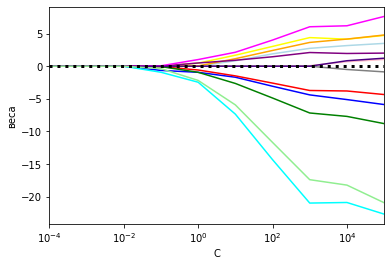

In [10]:
import matplotlib.pyplot as plt
fig = plt.figure()
ax = plt.subplot(111)

colors = ['blue', 'red' , 'green' , 'yellow', 'pink', 'grey', 'lightblue', 'orange', 'purple', 'cyan', 'magenta', 'indigo','lightgreen']
weights, params = [], []
for c in range(-4,6):
    lr = LogisticRegression(solver = "liblinear", penalty = 'l1', C = 10**c)
    lr.fit(X_train_std, y_train,)
    weights.append(lr.coef_[1])
    params.append(10**c)

weights=np.array(weights)
for column, color in zip(range(weights.shape[1]),colors):
    plt.plot(params, weights[:,column], label = wine.columns[column+1],color= color)

    
    
plt.xlabel('C')
plt.ylabel('веса')
plt.xscale("log")
plt.xlim([10**-4,10**5])
plt.axhline(0, linestyle = ":",color = 'black', linewidth = '3')

In [11]:
from sklearn.ensemble import RandomForestClassifier
wine.columns = ['Метка класса', "Алкоголь", "Яблочная кислота" , "Зола", "Щелочность золы", "Магний", "Всего фенола" , "Флаваноиды", "Фенолы нефлаваноидные", "Проантоцианины", "Интенсивность цвета","Оттенок", "Разбавленность вин", "Пролин"]
labels = wine.columns[1:]
forest = RandomForestClassifier(n_estimators = 10000, n_jobs = -1)
forest.fit(X_train, y_train)
importances = forest.feature_importances_
indeces = np.argsort(importances)[::-1]
for f in range(X_train.shape[1]):
    print (f+1,")  ", labels[indeces[f]]  , importances[indeces[f]])


1 )   Интенсивность цвета 0.18357544499270495
2 )   Пролин 0.15556185754690124
3 )   Флаваноиды 0.15150125153339236
4 )   Разбавленность вин 0.13233630340700608
5 )   Алкоголь 0.10666829133102335
6 )   Оттенок 0.07655989262167161
7 )   Всего фенола 0.062484939930426316
8 )   Щелочность золы 0.033813197884583715
9 )   Яблочная кислота 0.02407057509042913
10 )   Магний 0.0231039447986067
11 )   Проантоцианины 0.022328684182280296
12 )   Зола 0.014430698247120574
13 )   Фенолы нефлаваноидные 0.013564918433853629


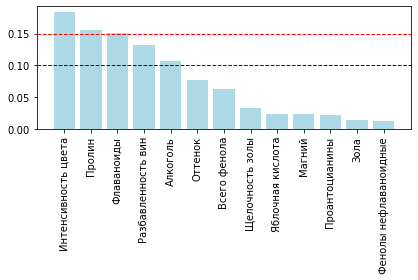

In [12]:
plt.bar(range(X_train.shape[1]), importances[indeces],color = "lightBlue")
plt.xticks(range(X_train.shape[1]),labels[indeces] , rotation = 90)
plt.axhline(0.1,linestyle = "--", color = 'blue', linewidth = '1')
plt.axhline(0.15,linestyle = "--", color = 'red', linewidth = '1')
plt.tight_layout()

In [119]:
forest = RandomForestClassifier(n_estimators = 100, min_impurity_split =0.1, n_jobs = -1)
forest.fit(X_train, y_train)

C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurity_split parameter is deprecated. "
C:\Users\User\anaconda3\lib\site-packages\sklearn\tree\_classes.py:306: FutureWarning: The min_impurity_split parameter is deprecated. Its default value has changed from 1e-7 to 0 in version 0.23, and it will be removed in 0.25. Use the min_impurity_decrease parameter instead.
  warnings.warn("The min_impurit

RandomForestClassifier(min_impurity_split=0.1, n_jobs=-1)

In [13]:
cov_mat =np.cov(X_train_std.T)
eigen_vals, eigen_vecs = np.linalg.eig(cov_mat)
print(eigen_vals)

[4.8923083  2.46635032 1.42809973 1.01233462 0.84906459 0.60181514
 0.52251546 0.08414846 0.33051429 0.29595018 0.16831254 0.21432212
 0.2399553 ]


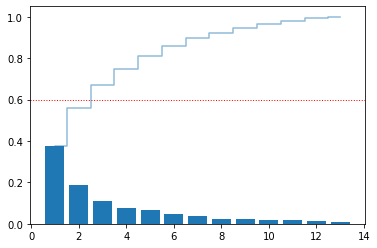

In [17]:
tot = sum(eigen_vals)
var_exp = [(i/  tot) for i in sorted(eigen_vals, reverse=True)]
cum_var_exp =np.cumsum(var_exp)
plt.bar(range(1,14), var_exp, align = 'center')
plt.step(range(1,14) , cum_var_exp, where = 'mid', alpha = 0.5)
plt.axhline(0.6 , color = "red" , linestyle = ':', linewidth = '1')

In [20]:
eigen_pairs = [(np.abs(eigen_vals[i]) , eigen_vecs[:,i]) for i in range(len(eigen_vals))]
eigen_pairs.sort(reverse = True)
w = np.hstack((eigen_pairs[0][1][:, np.newaxis],eigen_pairs[1][1][:, np.newaxis]))
print(w)

[[ 0.14669811 -0.50417079]
 [-0.24224554 -0.24216889]
 [-0.02993442 -0.28698484]
 [-0.25519002  0.06468718]
 [ 0.12079772 -0.22995385]
 [ 0.38934455 -0.09363991]
 [ 0.42326486 -0.01088622]
 [-0.30634956 -0.01870216]
 [ 0.30572219 -0.03040352]
 [-0.09869191 -0.54527081]
 [ 0.30032535  0.27924322]
 [ 0.36821154  0.174365  ]
 [ 0.29259713 -0.36315461]]


In [22]:
X_train_std[0].dot(w)

array([ 2.59891628, -0.00484089])

In [25]:
X_train_pca = X_train_std.dot(w)
print(X_train_pca)

[[ 2.59891628 -0.00484089]
 [ 0.15819134  2.26659577]
 [-2.6372337  -2.66488569]
 [-2.52848449 -0.51846618]
 [ 1.70922581  0.91719459]
 [-2.83057003 -0.41936129]
 [-2.82251879 -1.99763147]
 [ 1.36618015 -0.04639099]
 [-2.46584868  0.07932269]
 [-2.28554906  0.40096658]
 [ 1.14246632  2.39587633]
 [-2.28497881  1.09274988]
 [-2.52924945 -0.6477328 ]
 [ 0.169245    1.1264982 ]
 [ 2.53088166 -1.05798498]
 [-0.71596964  2.80365836]
 [ 2.46922033  0.15871191]
 [-0.58044574  0.69290749]
 [ 0.54583852 -0.41042188]
 [ 3.5604963  -1.42561284]
 [ 1.58679826  1.51260121]
 [ 2.54872139  0.05280515]
 [-3.59338727 -0.88321901]
 [-1.60406659 -2.40373662]
 [ 1.48668426  1.40863724]
 [ 0.00830468  2.04898307]
 [-0.15646658  2.80278355]
 [-2.39863877 -2.47524175]
 [-3.13549157  0.29421321]
 [ 3.30221023 -0.40939296]
 [-3.53069904 -1.79971521]
 [-0.45566459  2.61242833]
 [-0.58840115  1.98301934]
 [-1.16637216  0.83784744]
 [ 1.03763587  1.37755233]
 [ 1.95890184  1.62578024]
 [ 2.76990407 -1.86073384]
 

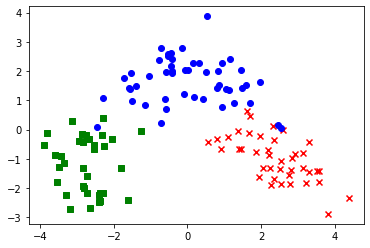

In [32]:
colors= ['red', 'blue', 'green']
markers = [ 'x' , 'o' , 's']
for l,c,m in zip(np.unique(y_train), colors, markers):
    plt.scatter(X_train_pca[y_train == l, 0], X_train_pca[y_train == l, 1], c=c, label=l, marker=m)


In [40]:
from matplotlib.colors import ListedColormap
def plot_decision_regions(X, y ,classifier, resolution = 0.02):
    
    markers = ('x' , 'o' , 's')
    colors = ('red', 'blue', 'green')
    cmap = ListedColormap(colors[:len(np.unique(y))])
    
    x1_min , x1_max = X[:, 0].min() - 1 , X[:, 0].max() + 1
    x2_min , x2_max = X[:, 1].min() - 1 , X[:, 1].max() + 1
    xx1, xx2 = np.meshgrid(np.arange(x1_min, x1_max, resolution) ,np.arange(x2_min, x2_max, resolution))
    
    Z =classifier.predict(np.array([xx1.ravel() , xx2.ravel()]).T)
    Z = Z.reshape(xx1.shape)
    
    plt.contourf(xx1, xx2, Z, alpha = 0.4, cmap = cmap)
    plt.xlim(xx1.min(), xx1.max())
    plt.ylim(xx2.min(), xx2.max())
    
    for idx, cl in enumerate(np.unique(y)):
        plt.scatter(x = X[y == cl, 0] , y = X[y == cl, 1],
            alpha = 0.8, c = cmap(idx), marker = markers[idx], label = cl)


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


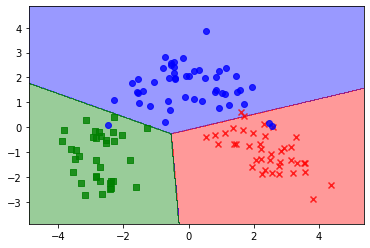

In [58]:
from sklearn.linear_model import LogisticRegression
from sklearn.decomposition import PCA
pca = PCA(n_components=2)
lr = LogisticRegression()
X_train_pca = pca.fit_transform(X_train_std)
X_test_pca = pca.transform(X_test_std)
lr.fit(X_train_pca, y_train)
plot_decision_regions(X_train_pca, y_train, classifier = lr)
plt.show()

*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.
*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


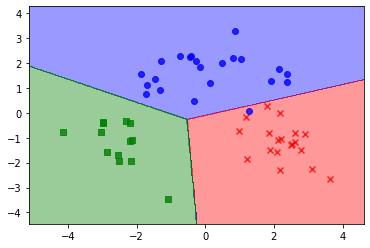

In [59]:
plot_decision_regions(X_test_pca, y_test, classifier = lr)